## Ejercicio 1: 
### Diferencias en la longitud de la altura de los cráneos egipcios a medida que pasa el tiempo.

### Ejercicio 1, inciso a)

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, kstest

# Cargar los datos desde el archivo Excel
df = pd.read_excel('datos_craneos.xlsx')

In [61]:
# Crear los grupos
group1 = df[df['Época histórica'] == 1]
group2 = df[df['Época histórica'] == 2]

# Calcular las medidas de centralización y dispersión de cada grupo
def calculate_measures(df):
    mean = np.mean(df['Altura del cráneo'])
    median = np.median(df['Altura del cráneo'])
    mode = df['Altura del cráneo'].mode()[0]
    std_dev = np.std(df['Altura del cráneo'])
    variance = np.var(df['Altura del cráneo'])
    return mean, median, mode, std_dev, variance

measures_group1 = calculate_measures(group1)
measures_group2 = calculate_measures(group2)

print('--------- Medidas para el grupo 1 (Época histórica = 1):---------')
print('Media:', measures_group1[0])
print('Mediana:', measures_group1[1])
print('Moda:', measures_group1[2])
print('Desviación típica:', measures_group1[3])
print('Varianza:', measures_group1[4])

print('\n---------Medidas para el grupo 2 (Época histórica = 2):---------')
print('Media:', measures_group2[0])
print('Mediana:', measures_group2[1])
print('Moda:', measures_group2[2])
print('Desviación típica:', measures_group2[3])
print('Varianza:', measures_group2[4])

# Ambas grupos de medidas de tendencia central son similares, por lo cual se puede observar 
# que la altura del cráneo en ambas épocas historicas se distribuye de manera similar, 
# aunque en la primera época la altura del cráneo es ligeramente mayor.

# La dispersión en la altura del cráneo en torno a la media es similar en ambas épocas historicas.

--------- Medidas para el grupo 1 (Época histórica = 1):---------
Media: 134.4
Mediana: 134.0
Moda: 134
Desviación típica: 1.051982255870633
Varianza: 1.106666666666666

---------Medidas para el grupo 2 (Época histórica = 2):---------
Media: 132.9
Mediana: 133.0
Moda: 133
Desviación típica: 1.0115993936995675
Varianza: 1.0233333333333325


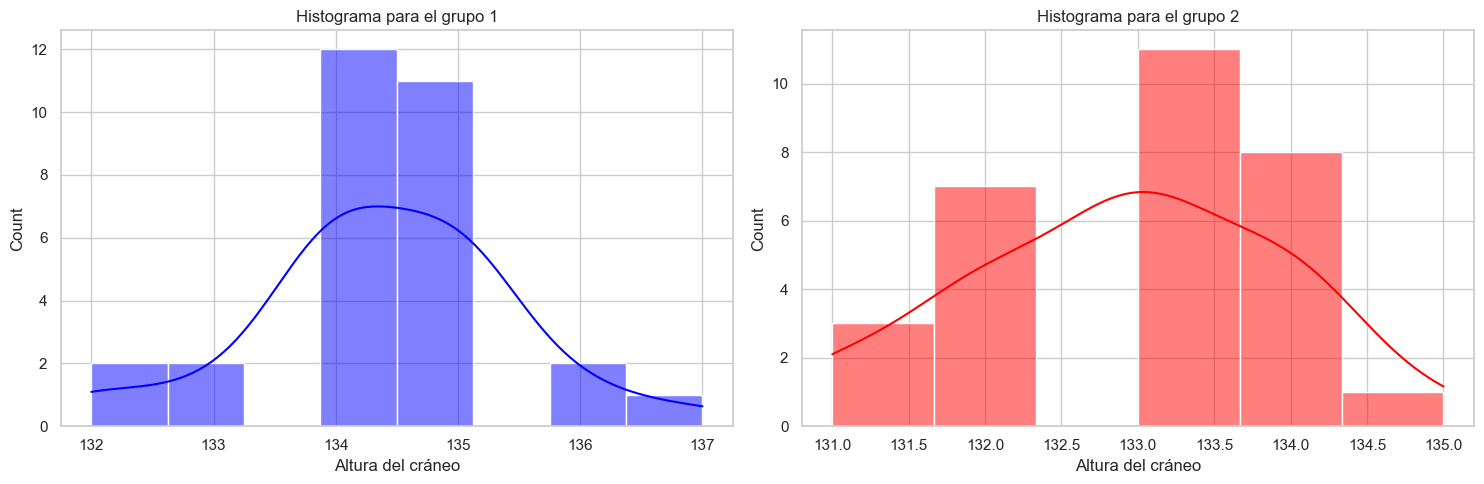

In [62]:
# Establecer el estilo de los gráficos
sns.set(style='whitegrid')

# Crear los gráficos
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Trazar los histogramas
sns.histplot(group1['Altura del cráneo'], kde=True, ax=axs[0], color='blue')
axs[0].set_title('Histograma para el grupo 1')
sns.histplot(group2['Altura del cráneo'], kde=True, ax=axs[1], color='red')
axs[1].set_title('Histograma para el grupo 2')

plt.tight_layout()
plt.show()

# Los histogramas muestran que la distribución de la altura del cráneo en
# ambos grupos es aproximadamente normal, con un ligero sesgo a la derecha.


In [63]:
# Calcular la asimetría y la curtosis de cada grupo
def calculate_skewness_kurtosis(df):
    skewness = skew(df['Altura del cráneo'])
    kurt = kurtosis(df['Altura del cráneo'])
    return skewness, kurt

skewness_kurtosis_group1 = calculate_skewness_kurtosis(group1)
skewness_kurtosis_group2 = calculate_skewness_kurtosis(group2)

print('---------Asimetría y curtosis para el grupo 1 (Época histórica = 1):---------')
print('Asimetría:', skewness_kurtosis_group1[0])
print('Curtosis:', skewness_kurtosis_group1[1])

print('\n---------Asimetría y curtosis para el grupo 2 (Época histórica = 2):---------')
print('Asimetría:', skewness_kurtosis_group2[0])
print('Curtosis:', skewness_kurtosis_group2[1])

# Se sabe que un resultado negativo en la asimetría indica que será una asimetría negativa, 
# pero también es interesante que el resultado es un valor muy cercano a cero. 
# Sin embargo, esta asimetría es bastante cercana a cero, lo que sugiere que la distribución es casi simétrica.

# En cuanto a la curtosis, se puede observar que ambos resultados son similares así que se puede concluir que
# para ambos casos se tiene una curtosis leptocúrtica.

---------Asimetría y curtosis para el grupo 1 (Época histórica = 1):---------
Asimetría: -0.16492100977506108
Curtosis: 0.6627957613586921

---------Asimetría y curtosis para el grupo 2 (Época histórica = 2):---------
Asimetría: -0.18547080099661672
Curtosis: -0.6174495220108382


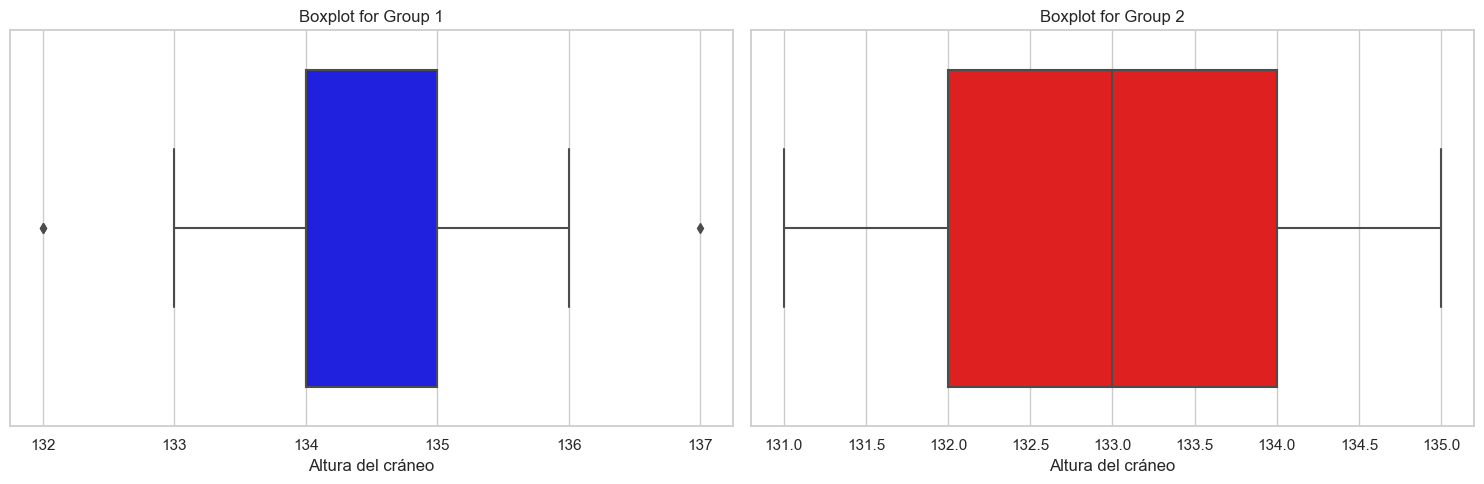

In [65]:
# Creando los gráficos
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Creando los gráficos de caja y bigotes
sns.boxplot(x=group1['Altura del cráneo'], ax=axs[0], color='blue')
axs[0].set_title('Boxplot for Group 1')
sns.boxplot(x=group2['Altura del cráneo'], ax=axs[1], color='red')
axs[1].set_title('Boxplot for Group 2')

plt.tight_layout()
plt.show()

# Algo que se puede destacar del diagrama de caja y bigotes, es que, en el grupo 1 
# la línea de la mediana no se puede visualizar a simple vista porque se encuentra 
# muy cerca del primer cuartil, lo que indica un ligero sesgo en los datos.

### Ejercicio 1, inciso b)

In [70]:
# Perform the Kolmogorov-Smirnov test for each group
def perform_kstest(df):
    stat, p = kstest(df['Altura del cráneo'], 'norm')
    return stat, p

ks_stat_p_group1 = perform_kstest(group1)
ks_stat_p_group2 = perform_kstest(group2)

print('---------Prueba de Kolmogorov-Smirnov para el grupo 1:---------')
print('Estadística:', ks_stat_p_group1[0])
print('p-valor:', ks_stat_p_group1[1])

print('\n---------Prueba de Kolmogorov-Smirnov para el grupo 2:---------')
print('Estadística:', ks_stat_p_group2[0])
print('p-valor:', ks_stat_p_group2[1])

# En ambos grupos, el valor p es 0,0, es decir, inferior a 0,05. Esto indica que podemos rechazar la hipótesis
# nula. Por lo tanto, según la prueba de Kolmogorov-Smirnov, ninguna de las dos submuestras sigue una
# distribución normal.

---------Prueba de Kolmogorov-Smirnov para el grupo 1:---------
Estadística: 1.0
p-valor: 0.0

---------Prueba de Kolmogorov-Smirnov para el grupo 2:---------
Estadística: 1.0
p-valor: 0.0
